In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

PATH = '/kaggle/input/power-transformers-fdd-and-rul/'

In [33]:
y_data = pd.read_csv(PATH + 'labels_rul_train.csv', index_col='id')
y_data.head()

,predicted
id,
2_trans_497.csv,550
2_trans_483.csv,1093
2_trans_2396.csv,861
2_trans_1847.csv,1093
2_trans_2382.csv,488


In [34]:
X_data = {}
for row in y_data.iterrows():
    file_name = row[0]
    path = PATH + f'data_train/{file_name}'
    X_data[file_name] = pd.read_csv(path)

In [35]:
first_key = list(X_data.keys())[0]
first_value = X_data[first_key]

print("First file name:", first_key)
print("First value stored:\n", first_value)


First file name: 2_trans_497.csv
First value stored:
            H2        CO      C2H4      C2H2
0    0.001202  0.029565  0.001069  0.000251
1    0.001202  0.029563  0.001068  0.000251
2    0.001201  0.029562  0.001066  0.000251
3    0.001201  0.029562  0.001064  0.000251
4    0.001201  0.029561  0.001063  0.000251
..        ...       ...       ...       ...
415  0.002276  0.041801  0.004549  0.000343
416  0.002281  0.041875  0.004569  0.000344
417  0.002285  0.041950  0.004590  0.000344
418  0.002290  0.042025  0.004610  0.000345
419  0.002294  0.042099  0.004630  0.000345

[420 rows x 4 columns]


In [36]:
y = y_data.copy()
X = pd.concat([X_data[file].mean() for file in y_data.index], axis=1).T
X.index = y.index
X = X.add_suffix('_mean')

In [37]:
X.head()

,H2_mean,CO_mean,C2H4_mean,C2H2_mean
id,,,,
2_trans_497.csv,0.001587,0.033522,0.002054,0.000277
2_trans_483.csv,0.002204,0.032708,0.003516,0.000089
2_trans_2396.csv,0.001134,0.026185,0.001413,0.000109
2_trans_1847.csv,0.000953,0.020431,0.005917,0.000295
2_trans_2382.csv,0.001933,0.010844,0.009218,0.000268


In [38]:
y.head()

,predicted
id,
2_trans_497.csv,550
2_trans_483.csv,1093
2_trans_2396.csv,861
2_trans_1847.csv,1093
2_trans_2382.csv,488


**# The missing value**

In [39]:
print(X.isnull().sum())
print(y.isnull().sum())

H2_mean      0
CO_mean      0
C2H4_mean    0
C2H2_mean    0
dtype: int64
predicted    0
dtype: int64


**See duplicuted value**

In [40]:
duplicates = X.duplicated().sum()
print(f'Number of duplicated rows: {duplicates}')

Number of duplicated rows: 0


**Describe the data**

In [41]:
print(X.describe())

           H2_mean      CO_mean    C2H4_mean    C2H2_mean
count  2100.000000  2100.000000  2100.000000  2100.000000
mean      0.001771     0.017072     0.004809     0.000194
std       0.000867     0.009744     0.002727     0.000110
min       0.000048     0.000512     0.000132     0.000006
25%       0.001037     0.008823     0.002525     0.000101
50%       0.001809     0.016944     0.004743     0.000192
75%       0.002515     0.025483     0.007150     0.000284
max       0.003763     0.039082     0.010654     0.000449


**Cheking for outliers**

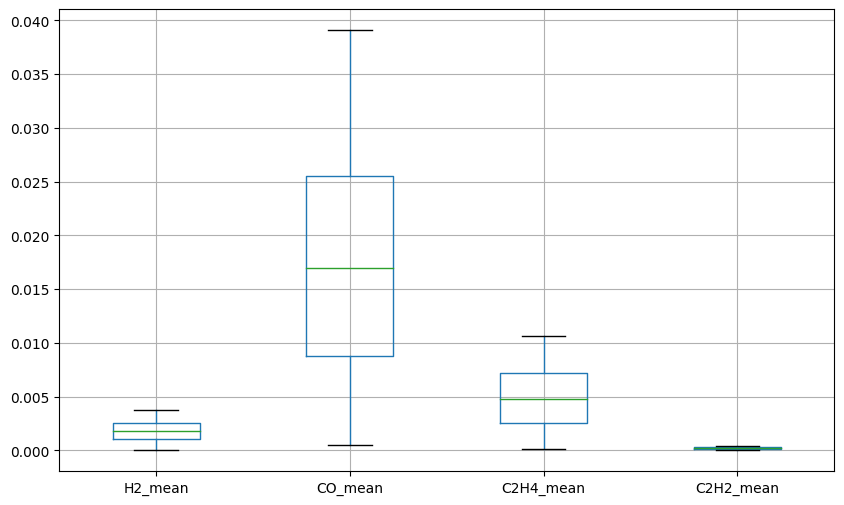

In [42]:
X.boxplot(figsize=(10,6))
plt.show()

In [43]:
print(X.shape)
print(y.shape)

(2100, 4)
(2100, 1)


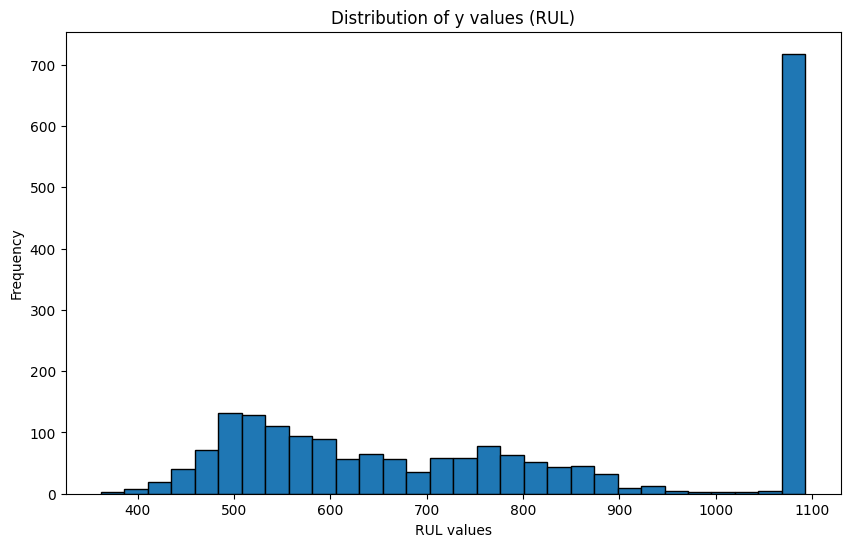

In [44]:
plt.figure(figsize=(10,6))
plt.hist(y, bins=30, edgecolor='black')
plt.title('Distribution of y values (RUL)')
plt.xlabel('RUL values')
plt.ylabel('Frequency')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)

In [48]:
print(f"Training data shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Validation data shape (X_val, y_val): {X_val.shape}, {y_val.shape}")

Training data shape (X_train, y_train): (1680, 4), (1680, 1)
Validation data shape (X_val, y_val): (420, 4), (420, 1)


**Linear Regression Model**

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f'MAE on training set: {mae_train:.2f}')
print(f'MAE on validation set: {mae_val:.2f}')
print('*'*50)
print(f'MSE on training set: {mse_train:.2f}')
print(f'MSE on validation set: {mse_val:.2f}')
print('*'*50)
print(f'R² on training set: {r2_train:.2f}')
print(f'R² on validation set: {r2_val:.2f}')

MAE on training set: 178.01
MAE on validation set: 172.61
**************************************************
MSE on training set: 44642.60
MSE on validation set: 42821.82
**************************************************
R² on training set: 0.25
R² on validation set: 0.25


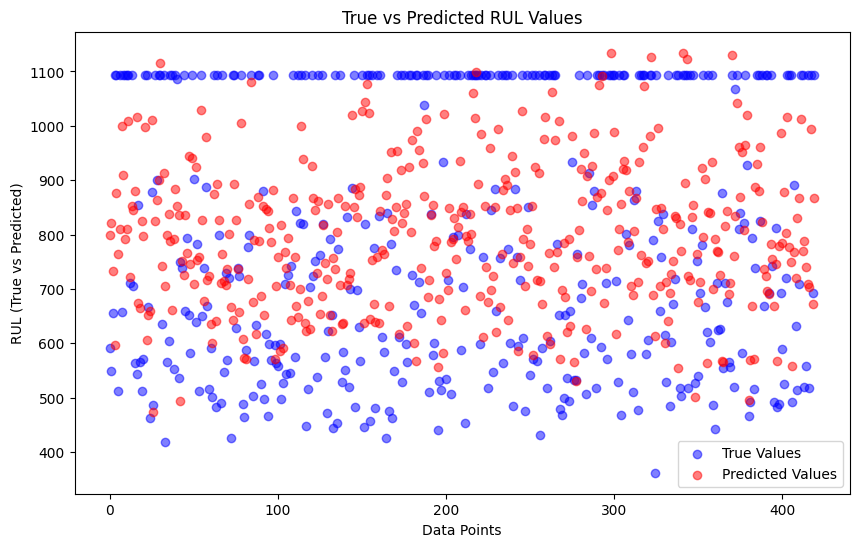

In [52]:
y_val_pred = lr.predict(X_val)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='True Values')
plt.scatter(range(len(y_val)), y_val_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('RUL (True vs Predicted)')
plt.title('True vs Predicted RUL Values')
plt.legend()
plt.show()

**Random Forest**

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
SelectedModel = RandomForestRegressor()

SelectedParameters = {
    'n_estimators': [50, 70 , 100, 120 ],     
    'max_depth': [ 3, 5, 7 ,10],     
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4]       
}

# تطبيق GridSearchCV
GridSearchModel = GridSearchCV(SelectedModel, SelectedParameters, cv=5, return_train_score=True)

# تدريب النموذج باستخدام بيانات التدريب
GridSearchModel.fit(X_train, y_train.values.ravel())

# الحصول على النتائج
sorted(GridSearchModel.cv_results_.keys())

# عرض النتائج كـ DataFrame
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']]

# عرض النتائج النهائية
print('All Results are :\n', GridSearchResults)
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)


All Results are :
      mean_test_score  std_test_score  \
0           0.258872        0.006981   
1           0.257326        0.004609   
2           0.263603        0.006237   
3           0.261982        0.005752   
4           0.258658        0.005076   
..               ...             ...   
139         0.309000        0.011144   
140         0.304905        0.010910   
141         0.312248        0.012895   
142         0.309576        0.011574   
143         0.309287        0.011246   

                                                params  rank_test_score  \
0    {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...              128   
1    {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...              137   
2    {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...              110   
3    {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...              116   
4    {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...              131   
..                                                

In [55]:
# استخدام أفضل نموذج تم العثور عليه عبر GridSearchCV
best_model = GridSearchModel.best_estimator_

# توقعات على بيانات التدريب وبيانات التحقق
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# حساب MAE لمجموعة التدريب والتحقق
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

# حساب MSE لمجموعة التدريب والتحقق
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# حساب R² لمجموعة التدريب والتحقق
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# طباعة النتائج
print(f'MAE on training set: {mae_train:.2f}')
print(f'MAE on validation set: {mae_val:.2f}')
print('*'*50)
print(f'MSE on training set: {mse_train:.2f}')
print(f'MSE on validation set: {mse_val:.2f}')
print('*'*50)
print(f'R² on training set: {r2_train:.2f}')
print(f'R² on validation set: {r2_val:.2f}')


MAE on training set: 157.75
MAE on validation set: 162.54
**************************************************
MSE on training set: 34048.14
MSE on validation set: 36499.30
**************************************************
R² on training set: 0.43
R² on validation set: 0.36


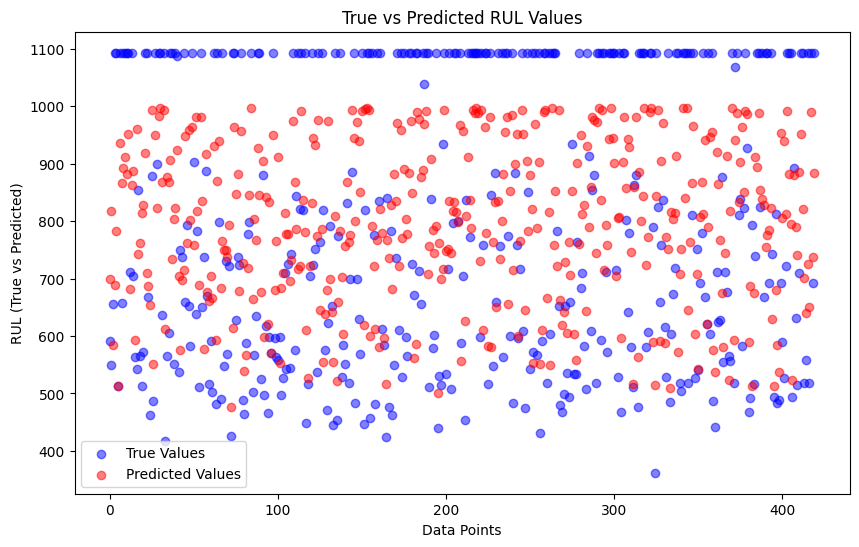

In [56]:
# استخدام أفضل نموذج تم العثور عليه عبر GridSearchCV للتوقعات
y_val_pred = best_model.predict(X_val)

# رسم القيم الحقيقية مقابل القيم المتوقعة
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='True Values')
plt.scatter(range(len(y_val)), y_val_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('RUL (True vs Predicted)')
plt.title('True vs Predicted RUL Values')
plt.legend()
plt.show()


**XGBRegressor**

In [57]:
from xgboost import XGBRegressor

In [58]:
SelectedModel = XGBRegressor(objective='reg:squarederror')

SelectedParameters = {
    'n_estimators': [50, 70, 100, 120],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 2, 4],  
    'subsample': [0.5, 0.7, 1.0],         
}

# تطبيق GridSearchCV
GridSearchModel = GridSearchCV(SelectedModel, SelectedParameters, cv=5, return_train_score=True)

# تدريب النموذج باستخدام بيانات التدريب
GridSearchModel.fit(X_train, y_train.values.ravel())

# الحصول على النتائج
sorted(GridSearchModel.cv_results_.keys())

# عرض النتائج كـ DataFrame
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params', 'rank_test_score', 'mean_fit_time']]

# عرض النتائج النهائية
print('All Results are:\n', GridSearchResults)
print('Best Score is:', GridSearchModel.best_score_)
print('Best Parameters are:', GridSearchModel.best_params_)
print('Best Estimator is:', GridSearchModel.best_estimator_)


All Results are:
      mean_test_score  std_test_score  \
0           0.263708        0.019751   
1           0.276422        0.020411   
2           0.291213        0.026236   
3           0.242329        0.019734   
4           0.253136        0.024458   
..               ...             ...   
139         0.054221        0.027968   
140         0.121475        0.043544   
141         0.008315        0.024674   
142         0.052655        0.028321   
143         0.119867        0.043294   

                                                params  rank_test_score  \
0    {'max_depth': 3, 'min_child_weight': 1, 'n_est...               10   
1    {'max_depth': 3, 'min_child_weight': 1, 'n_est...                4   
2    {'max_depth': 3, 'min_child_weight': 1, 'n_est...                2   
3    {'max_depth': 3, 'min_child_weight': 1, 'n_est...               19   
4    {'max_depth': 3, 'min_child_weight': 1, 'n_est...               13   
..                                                 

In [59]:
best_model = GridSearchModel.best_estimator_

# توقعات على بيانات التدريب وبيانات التحقق
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# حساب MAE لمجموعة التدريب والتحقق
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

# حساب MSE لمجموعة التدريب والتحقق
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# حساب R² لمجموعة التدريب والتحقق
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

# طباعة النتائج
print(f'MAE on training set: {mae_train:.2f}')
print(f'MAE on validation set: {mae_val:.2f}')
print('*' * 50)
print(f'MSE on training set: {mse_train:.2f}')
print(f'MSE on validation set: {mse_val:.2f}')
print('*' * 50)
print(f'R² on training set: {r2_train:.2f}')
print(f'R² on validation set: {r2_val:.2f}')


MAE on training set: 137.38
MAE on validation set: 161.48
**************************************************
MSE on training set: 27911.47
MSE on validation set: 37790.37
**************************************************
R² on training set: 0.53
R² on validation set: 0.34


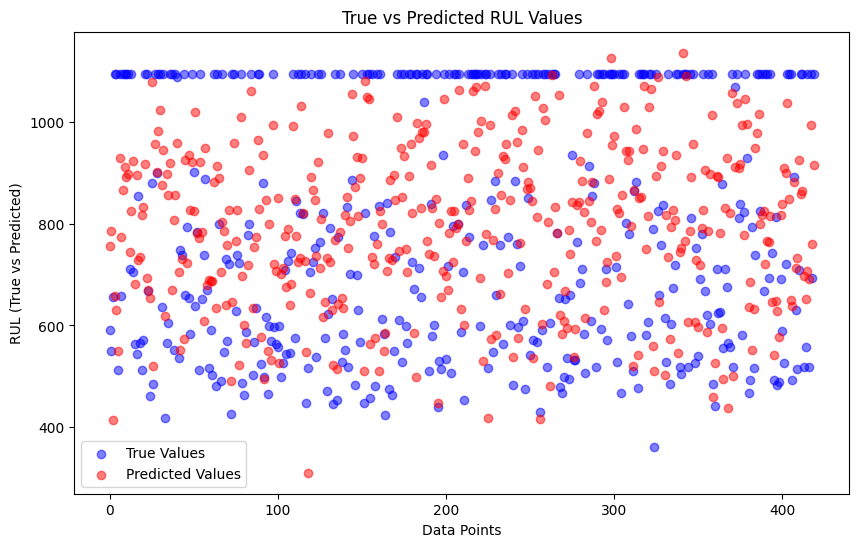

In [60]:
# استخدام أفضل نموذج تم العثور عليه عبر GridSearchCV للتوقعات
y_val_pred = best_model.predict(X_val)

# رسم القيم الحقيقية مقابل القيم المتوقعة
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.5, label='True Values')
plt.scatter(range(len(y_val)), y_val_pred, color='red', alpha=0.5, label='Predicted Values')

plt.xlabel('Data Points')
plt.ylabel('RUL (True vs Predicted)')
plt.title('True vs Predicted RUL Values')
plt.legend()
plt.show()
